In [1]:
import os 
os.listdir('/kaggle/input/')

['ieee-fraud-detection']

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

df_train_id = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
df_train_txn = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
df_test_id = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')
df_test_txn = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')

df_sample = pd.read_csv('/kaggle/input/ieee-fraud-detection/sample_submission.csv')

In [3]:
df_train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
df_train_txn.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_test_id.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [6]:
df_test_txn.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("Full Train Set")
df_train = pd.merge(df_train_txn, df_train_id, on = 'TransactionID', how = 'left' )
df_train.head(2)


Full Train Set


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("Full Test Set")
df_test = pd.merge(df_test_txn, df_test_id, on = 'TransactionID', how = 'left')
df_test.head(2)

Full Test Set


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

## Data Overview

In [9]:
print("Shape of train_identity", df_train_id.shape)
print("Shape of test_identity", df_test_id.shape)
print("Shape of train_transaction", df_train_txn.shape)
print("Shape of test_transaction", df_test_txn.shape)

print("\n\nShape of train_full", df_train.shape)
print("Shape of test_full", df_test.shape)

Shape of train_identity (144233, 41)
Shape of test_identity (141907, 41)
Shape of train_transaction (590540, 394)
Shape of test_transaction (506691, 393)


Shape of train_full (590540, 434)
Shape of test_full (506691, 433)


In [10]:
df = df_train

In [20]:
pd.set_option('display.max_columns', None)      
pd.set_option('display.max_rows', None)         
pd.set_option('display.max_colwidth', None)      
pd.set_option('display.width', 1000)           
pd.set_option('display.expand_frame_repr', False)

In [18]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 434 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         590540 non-null  int64  
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           581607 non-null  float64
 7    card3           588975 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           586281 non-null  float64
 10   card6           588969 non-null  object 
 11   addr1           524834 non-null  float64
 12   addr2           524834 non-null  float64
 13   dist1           238269 non-null  float64
 14   dist2           37627 non-null   float64
 15   P_emaildomain   496084 non-null  object 
 16   R_emaildomain   137291 non-null  obj

In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,NaN,NaN,NaN,3282269.5,170474.35832,2987000.0,3134634.75,3282269.5,3429904.25,3577539.0
isFraud,590540.0,NaN,NaN,NaN,0.03499,0.183755,0.0,0.0,0.0,0.0,1.0
TransactionDT,590540.0,NaN,NaN,NaN,7372311.310116,4617223.64654,86400.0,3027057.75,7306527.5,11246620.0,15811131.0
TransactionAmt,590540.0,NaN,NaN,NaN,135.027176,239.162522,0.251,43.321,68.769,125.0,31937.391
ProductCD,590540,5,W,439670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card1,590540.0,NaN,NaN,NaN,9898.734658,4901.170153,1000.0,6019.0,9678.0,14184.0,18396.0
card2,581607.0,NaN,NaN,NaN,362.555488,157.793246,100.0,214.0,361.0,512.0,600.0
card3,588975.0,NaN,NaN,NaN,153.194925,11.336444,100.0,150.0,150.0,150.0,231.0
card4,588963,4,visa,384767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card5,586281.0,NaN,NaN,NaN,199.278897,41.244453,100.0,166.0,226.0,226.0,237.0


In [22]:
df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614


<Axes: >

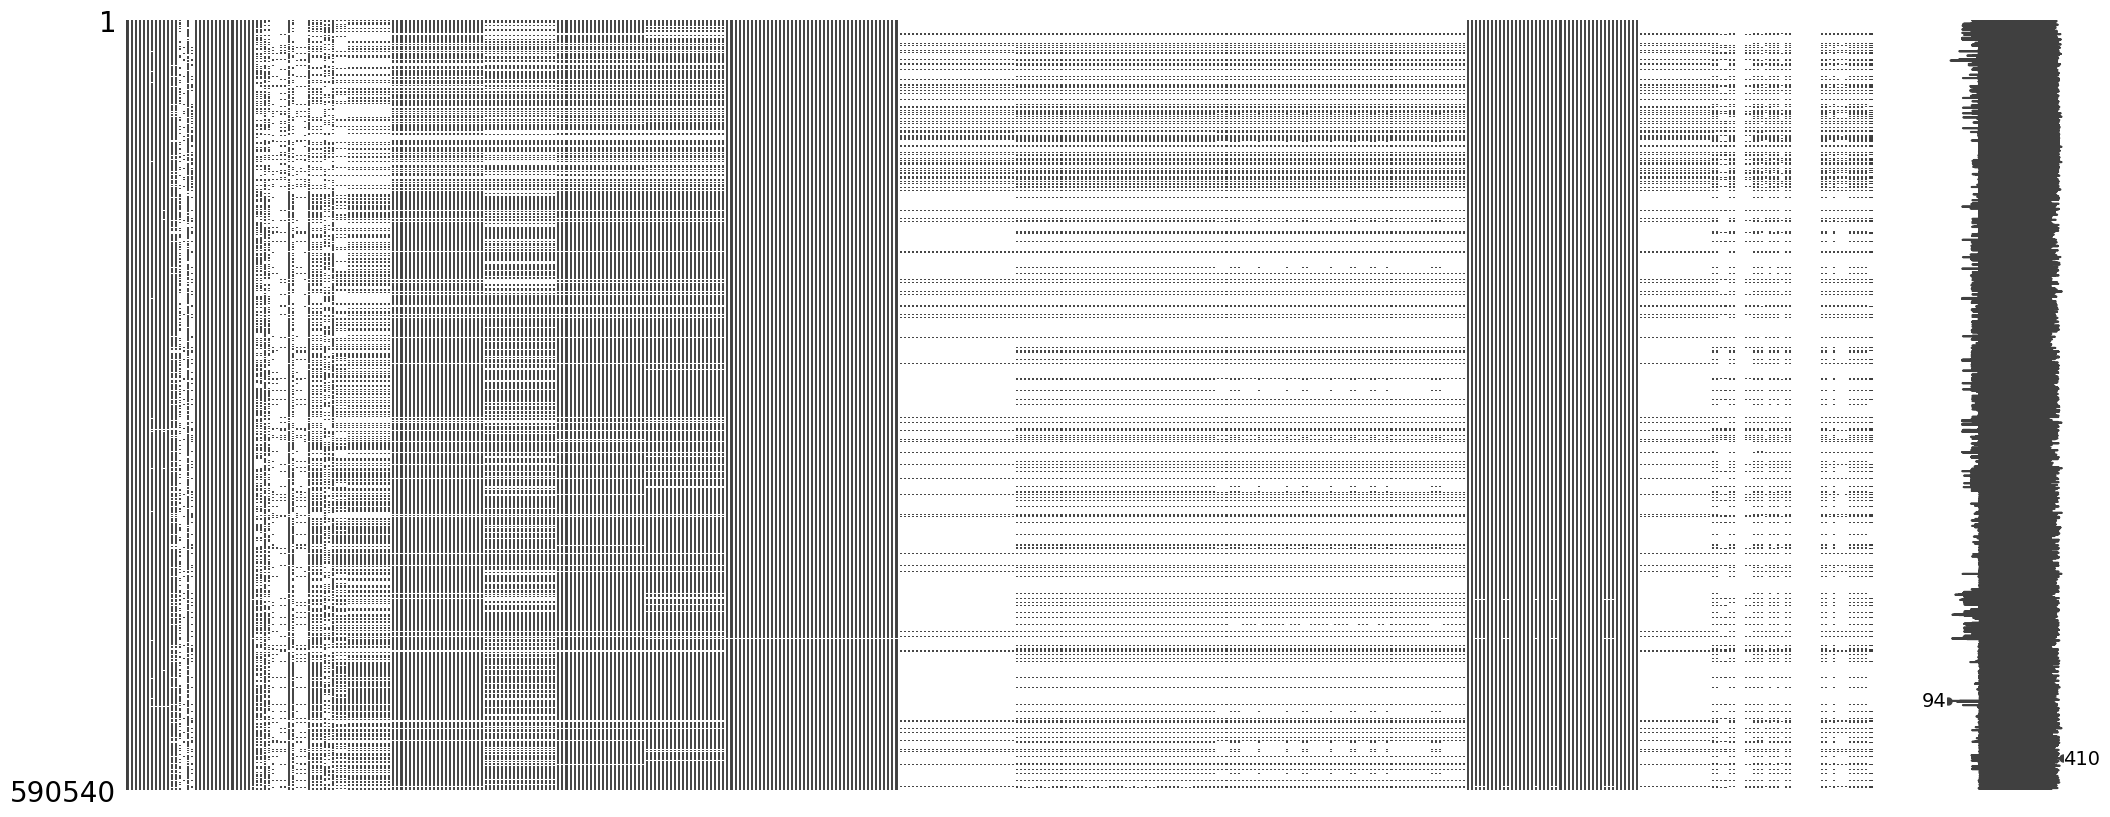

In [23]:
import missingno as msno

msno.matrix(df)


<Axes: >

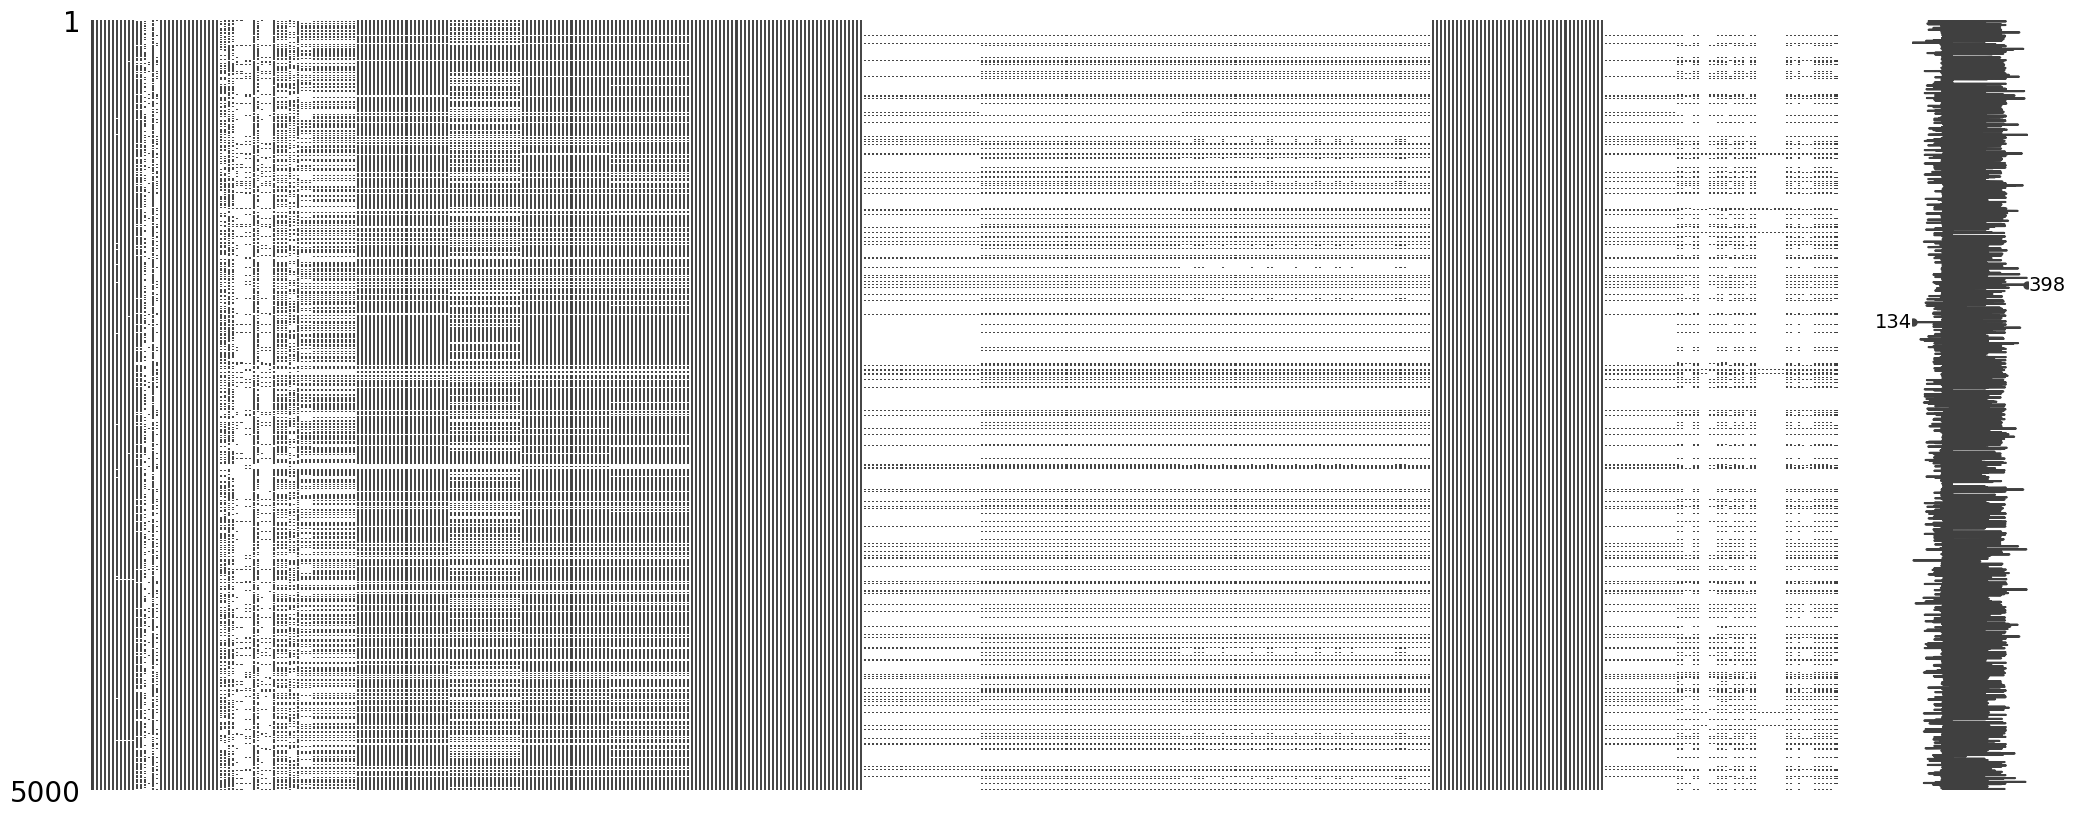

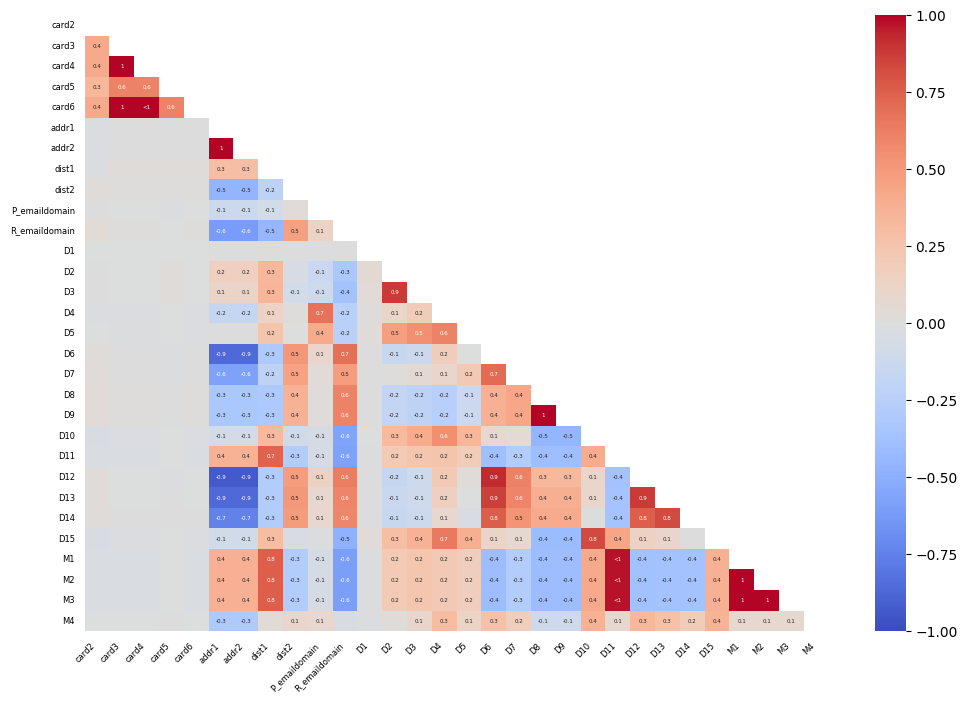

In [24]:
df_sample = df.sample(5000, random_state=42)

cols_sample = df.columns[:50]
df_subset = df[cols_sample]

msno.matrix(df_sample)
msno.heatmap(
    df_subset,  
    figsize=(12, 8),
    fontsize=6,
    cmap='coolwarm'
)

In [25]:
df.duplicated().sum()


0

## Target-focused EDA


Class Distribution : 
 isFraud
0    569877
1     20663
Name: count, dtype: int64
Class ratio: 0.0363


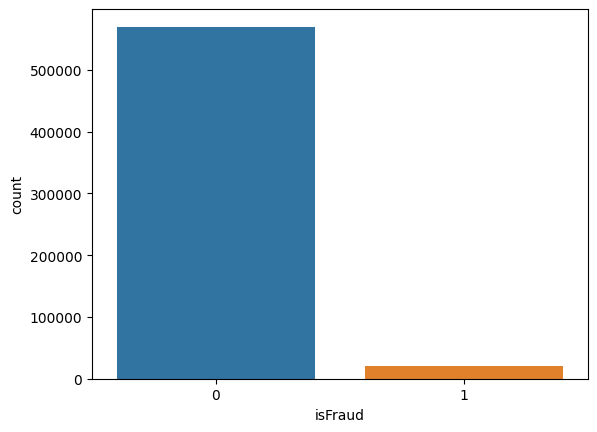

In [26]:
target_counts = df['isFraud'].value_counts()

print(f"Class Distribution : \n {target_counts}")
print(f"Class ratio: {target_counts[1]/target_counts[0]:.4f}")
sns.countplot(x = 'isFraud', data = df)
plt.show()

## Numerical Distribution and Outlier Visualization

=== Skewness & Kurtosis (Numerical Features) ===
TransactionID        | Skew: 0.00 | Kurtosis: -1.20
TransactionDT        | Skew: 0.13 | Kurtosis: -1.23
TransactionAmt       | Skew: 14.37 | Kurtosis: 1123.96
card1                | Skew: -0.04 | Kurtosis: -1.14
card2                | Skew: -0.20 | Kurtosis: -1.33
card3                | Skew: 2.02 | Kurtosis: 6.32
card5                | Skew: -1.22 | Kurtosis: -0.05
addr1                | Skew: 0.37 | Kurtosis: -0.50
addr2                | Skew: -14.50 | Kurtosis: 256.78
dist1                | Skew: 5.11 | Kurtosis: 36.80
dist2                | Skew: 5.97 | Kurtosis: 58.68
C1                   | Skew: 23.96 | Kurtosis: 669.38
C2                   | Skew: 23.68 | Kurtosis: 655.17
C3                   | Skew: 88.95 | Kurtosis: 11000.44
C4                   | Skew: 22.08 | Kurtosis: 543.41
C5                   | Skew: 5.79 | Kurtosis: 35.98
C6                   | Skew: 19.77 | Kurtosis: 463.83
C7                   | Skew: 27.19 | Kurtosis: 

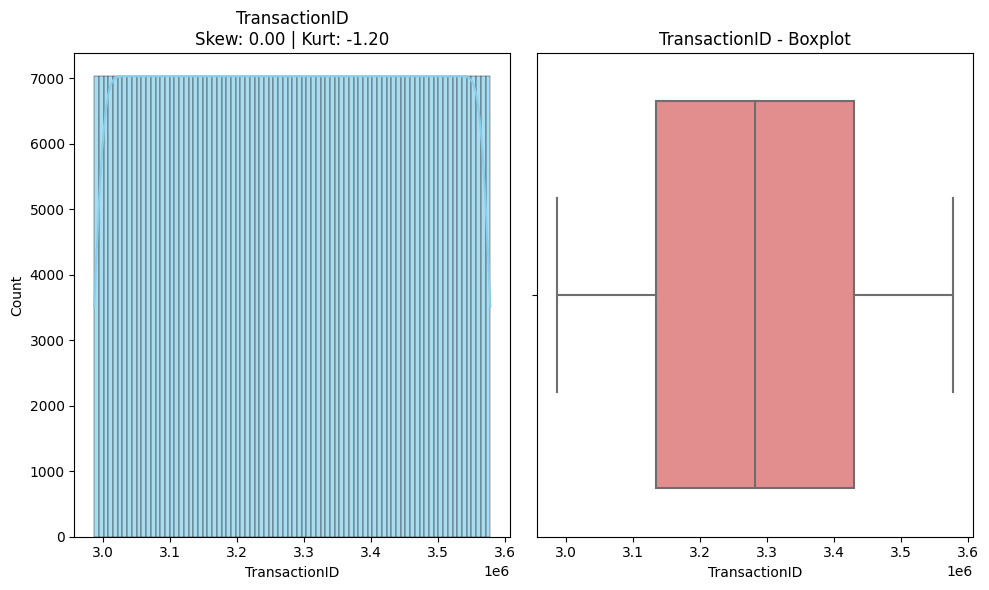

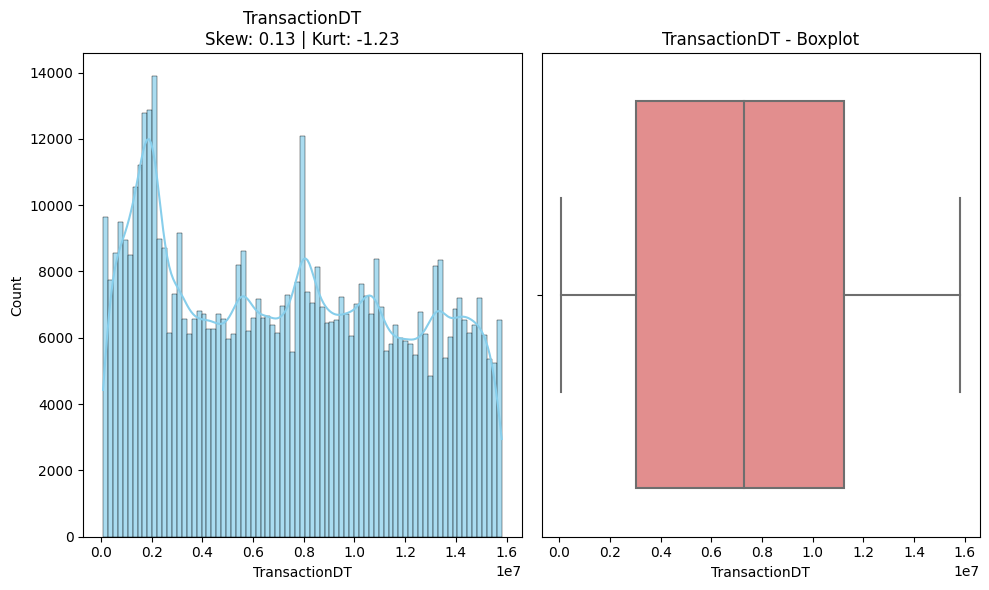

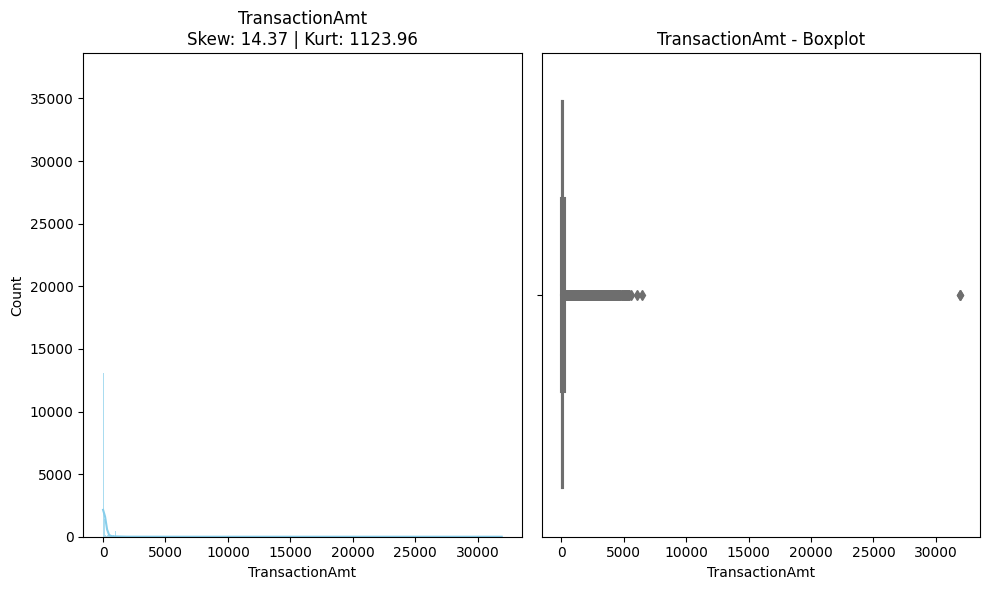

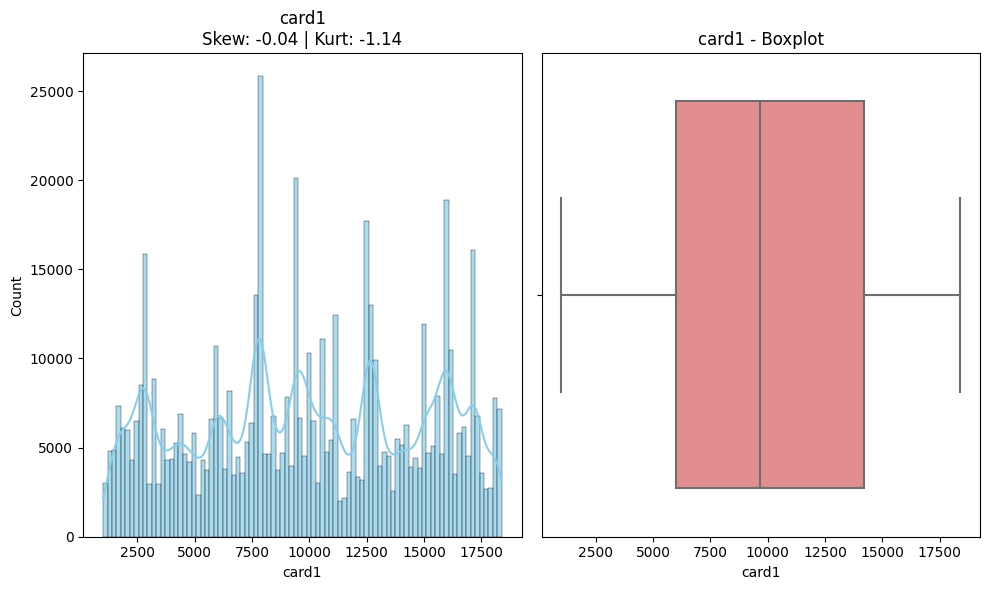

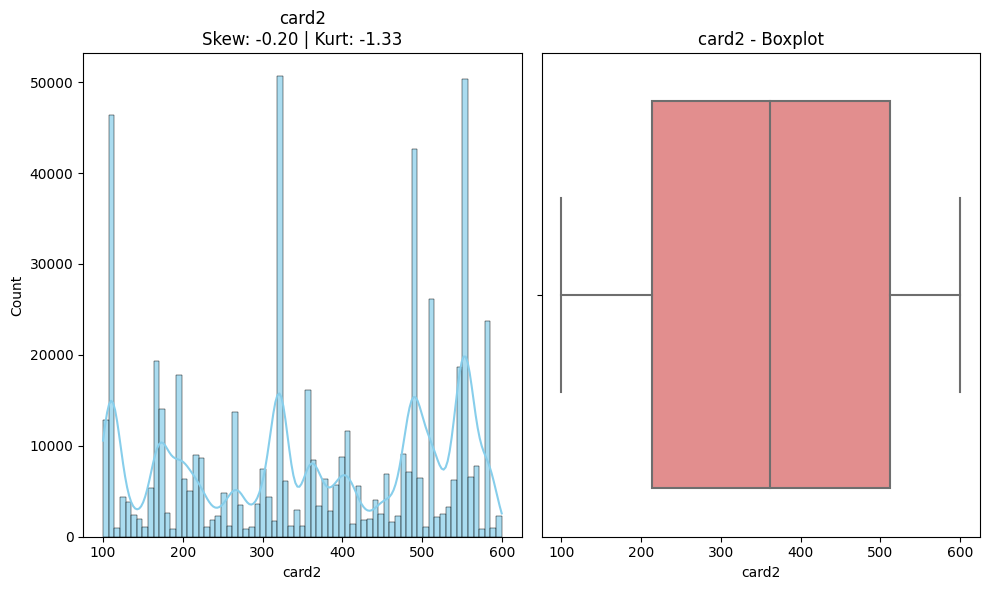

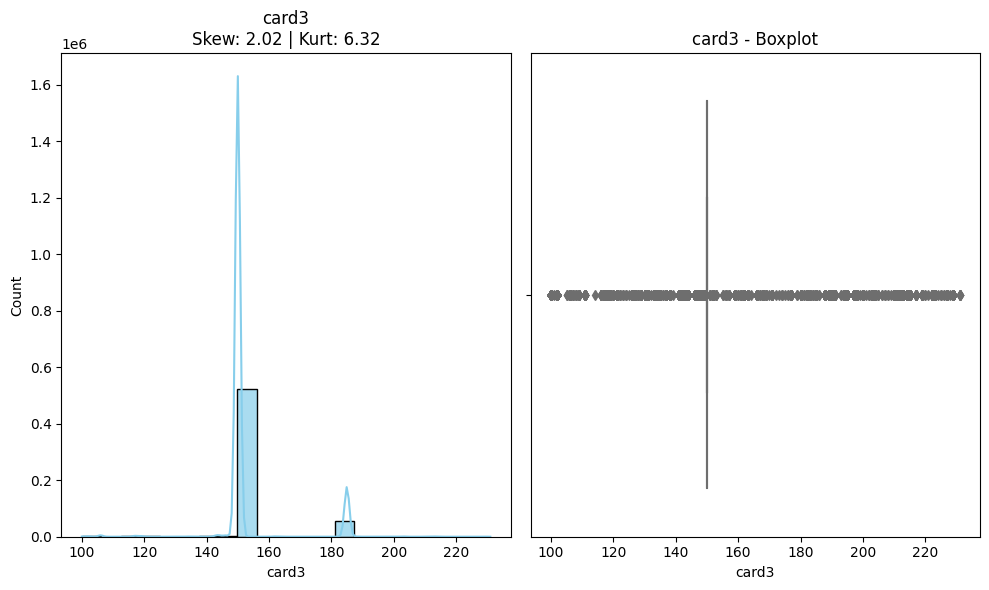

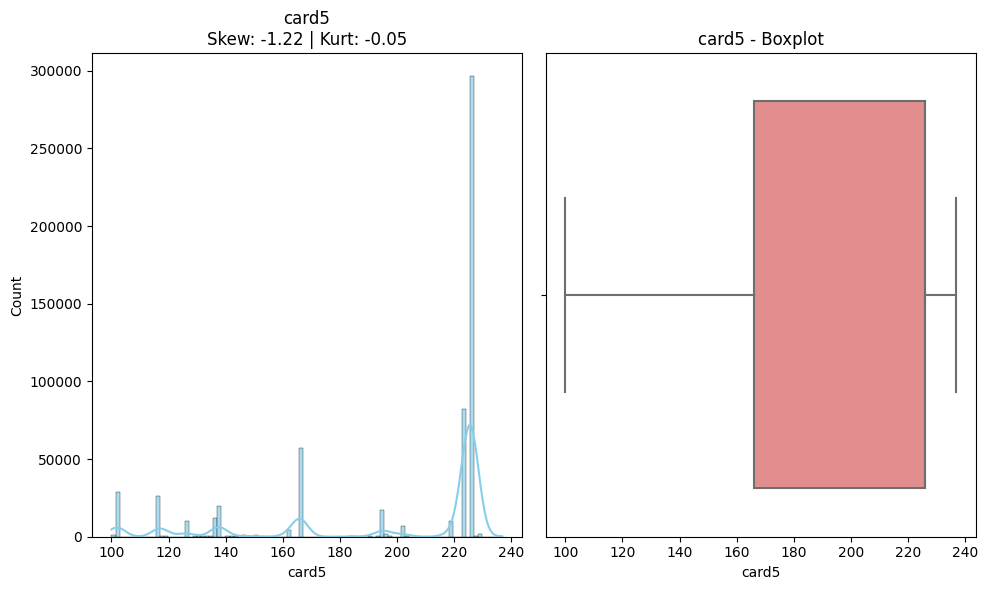

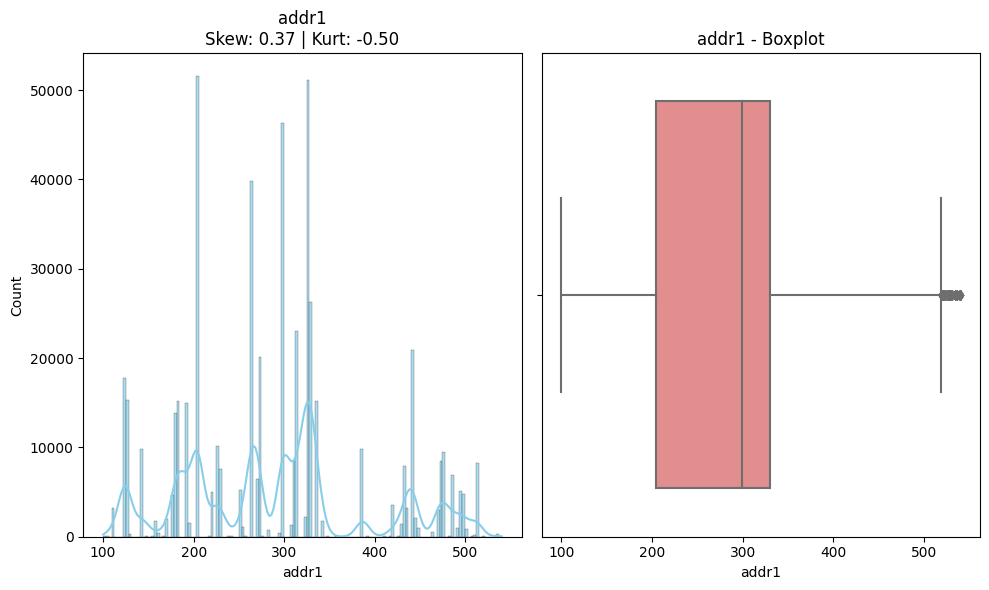

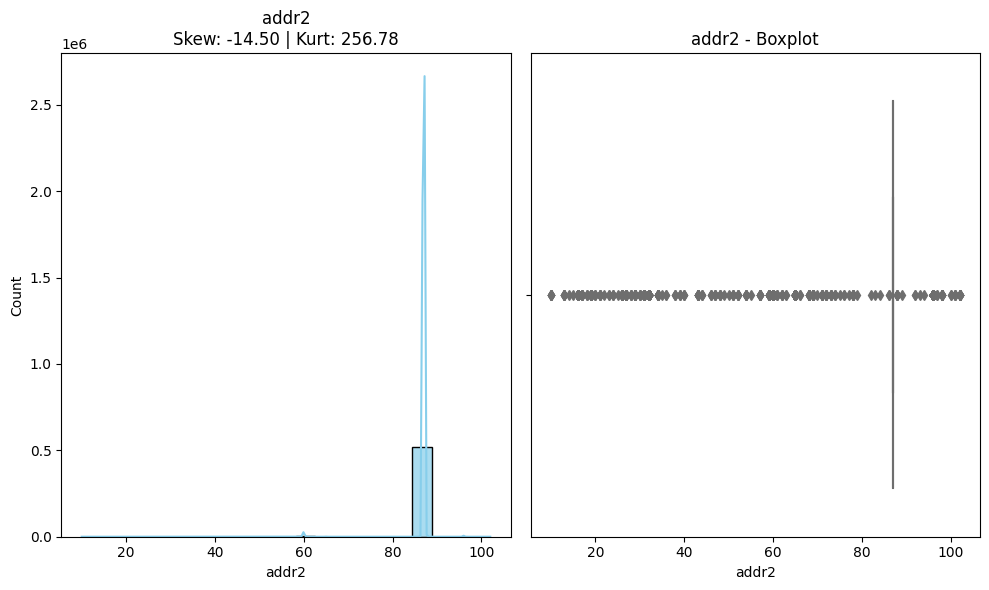

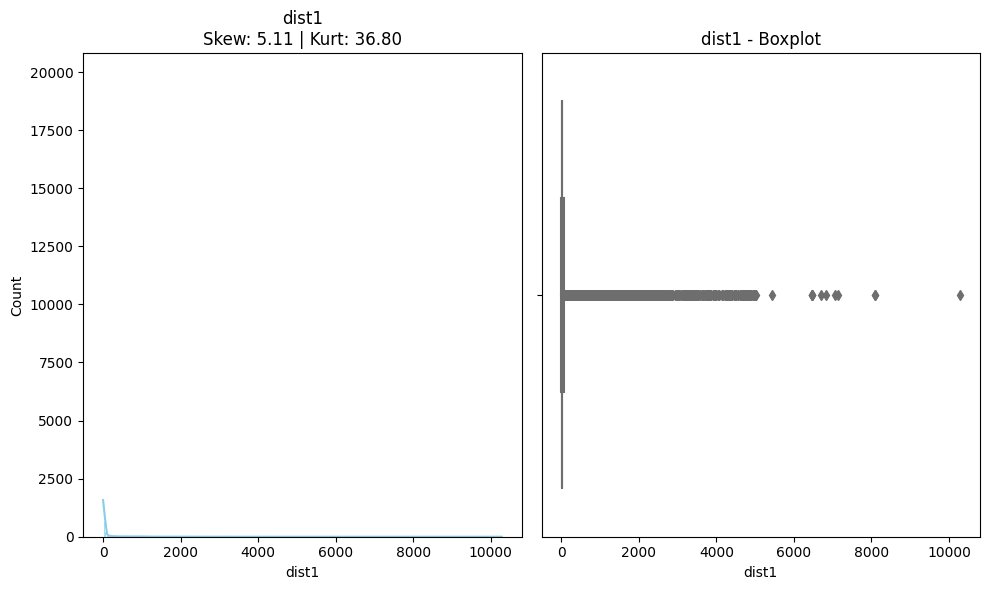

In [30]:
num_cols = df.select_dtypes(include=['int64', 'float64']).drop('isFraud', axis=1).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("=== Skewness & Kurtosis (Numerical Features) ===")
for col in num_cols:
    if df[col].nunique() > 1:   
        print(f"{col:<20} | Skew: {df[col].skew():.2f} | Kurtosis: {df[col].kurt():.2f}")

print("\n=== Plotting First 10 Numerical Features ===")
for col in num_cols[:10]:
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, color='skyblue', alpha=0.7)
    plt.title(f"{col}\nSkew: {df[col].skew():.2f} | Kurt: {df[col].kurt():.2f}")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna(), color='lightcoral')
    plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()
    plt.close()  

## Categorical Distribution and Target Mean Plot Visualization

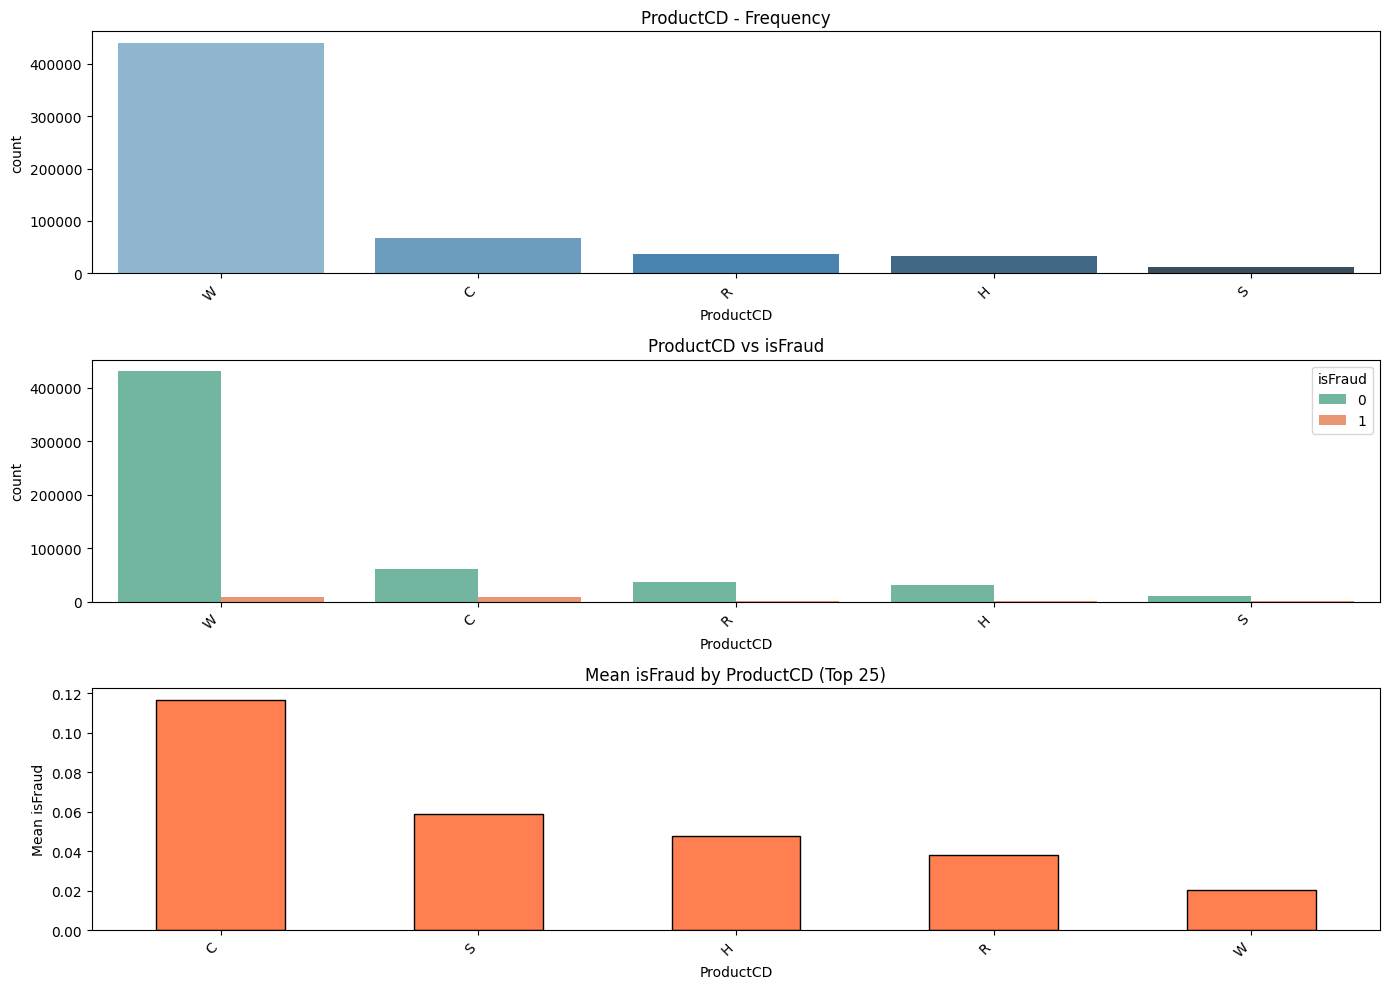

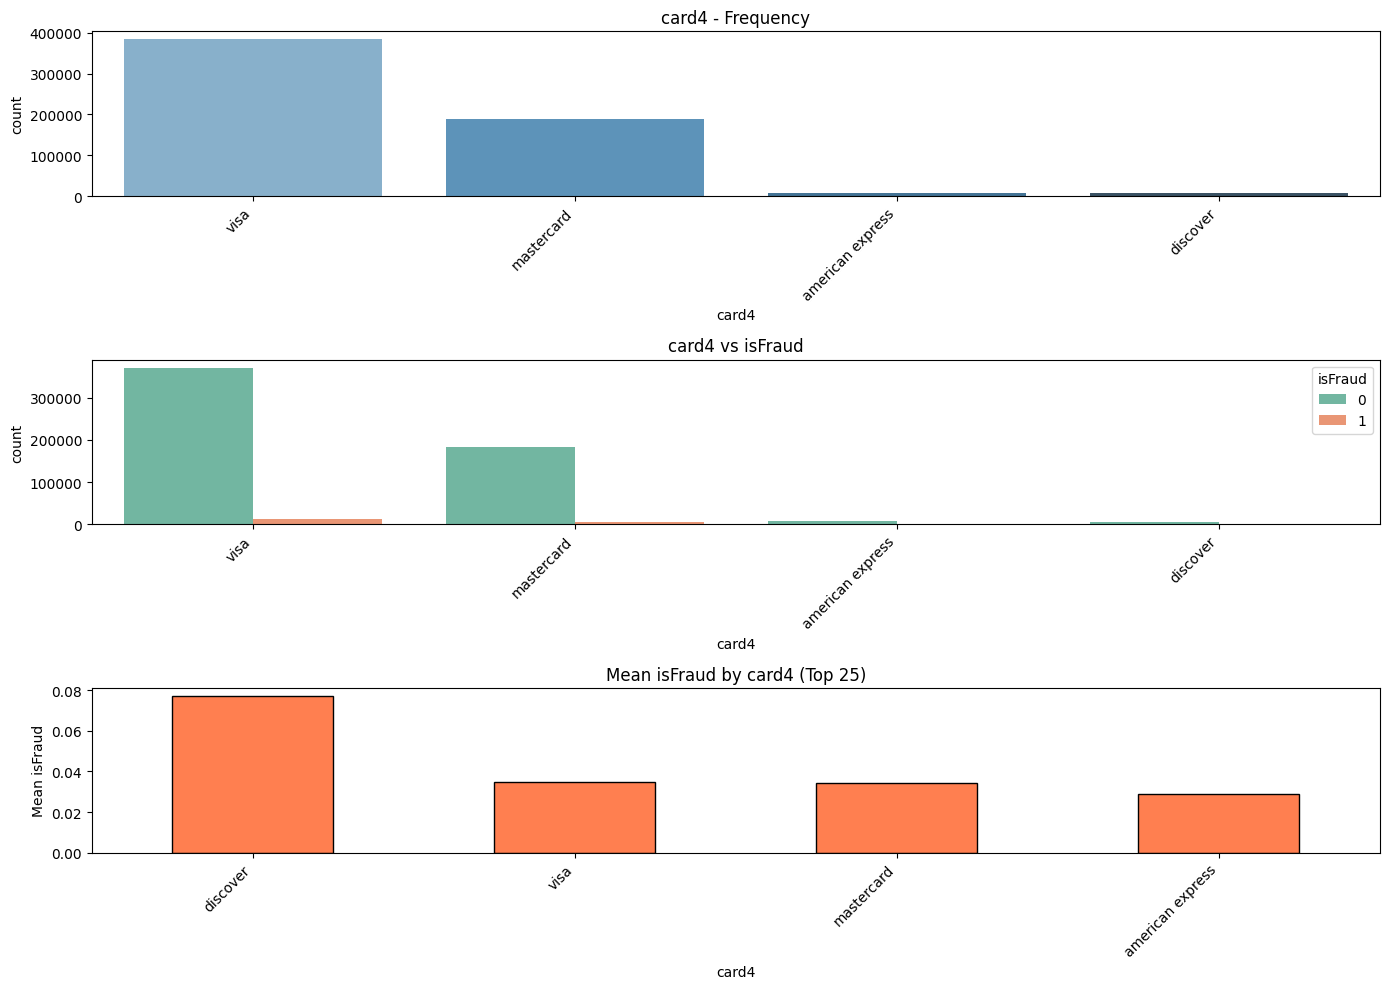

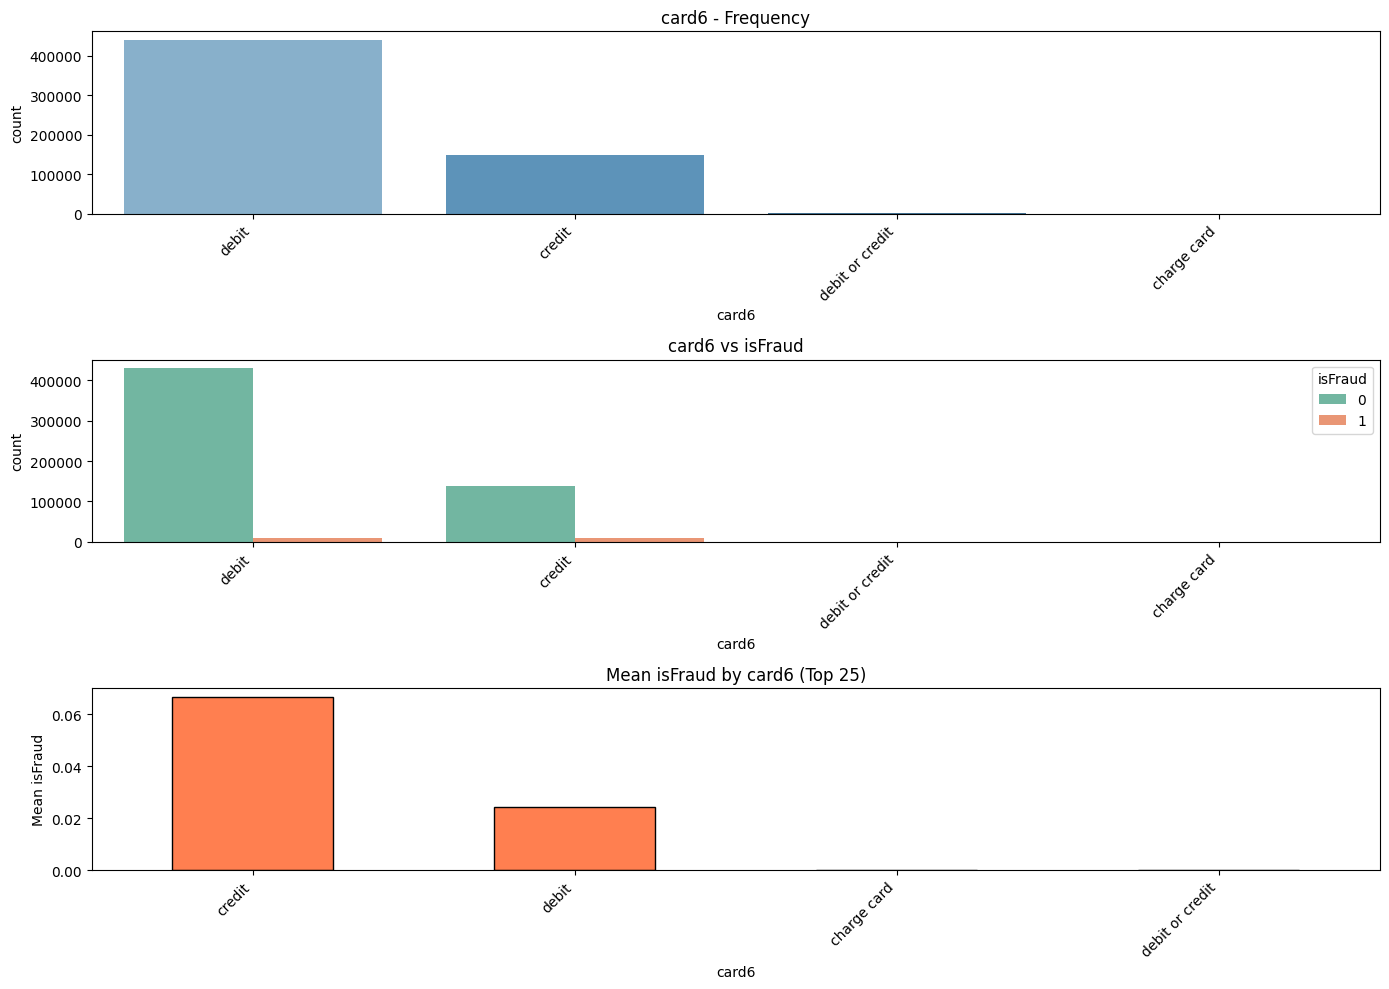

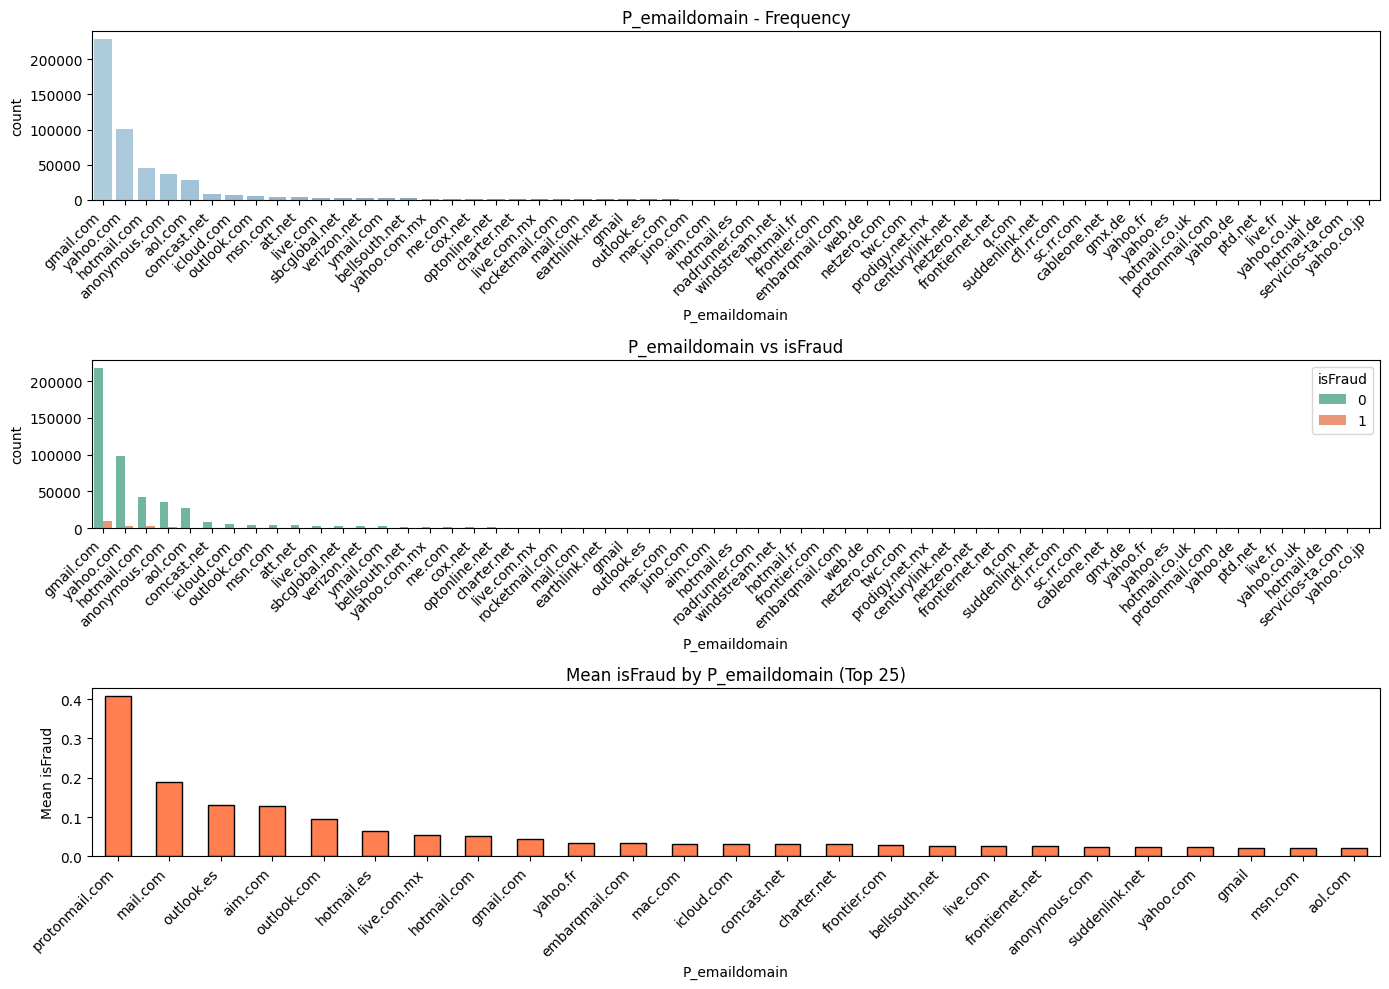

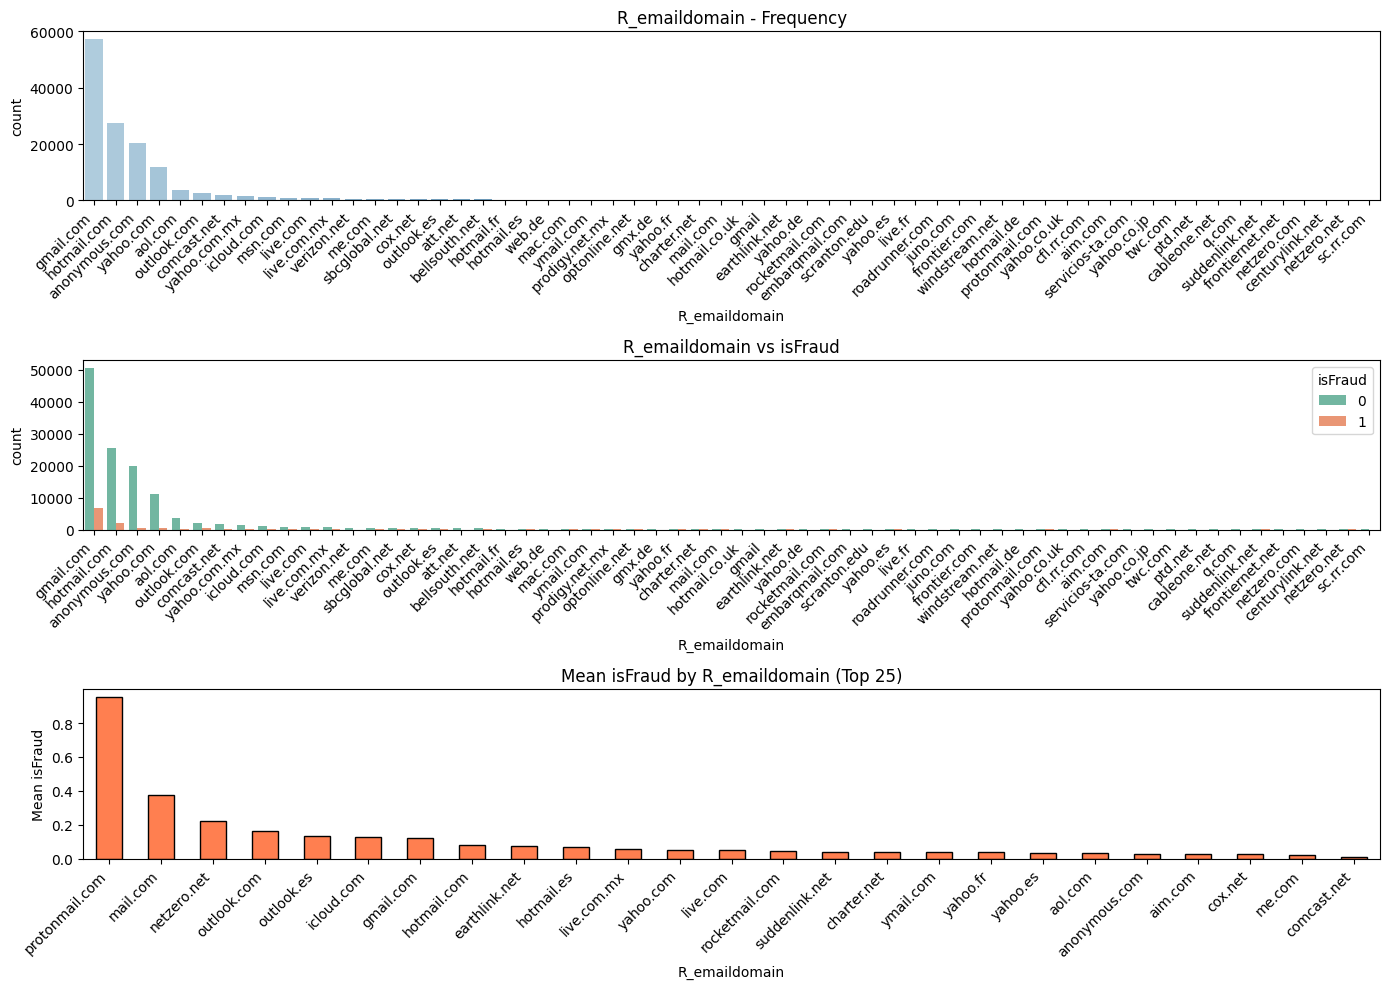

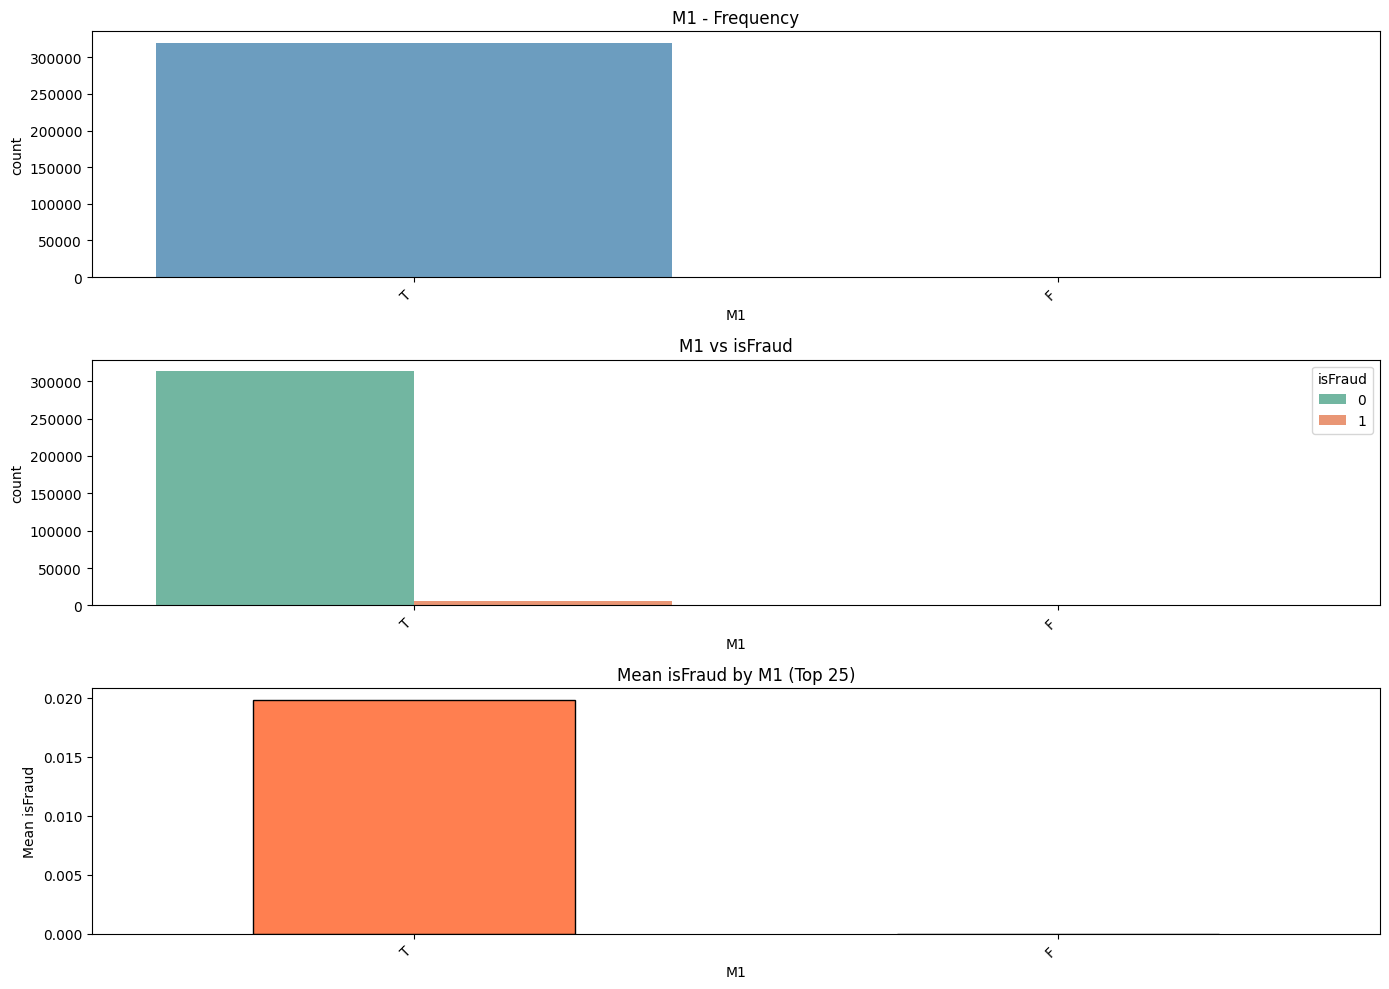

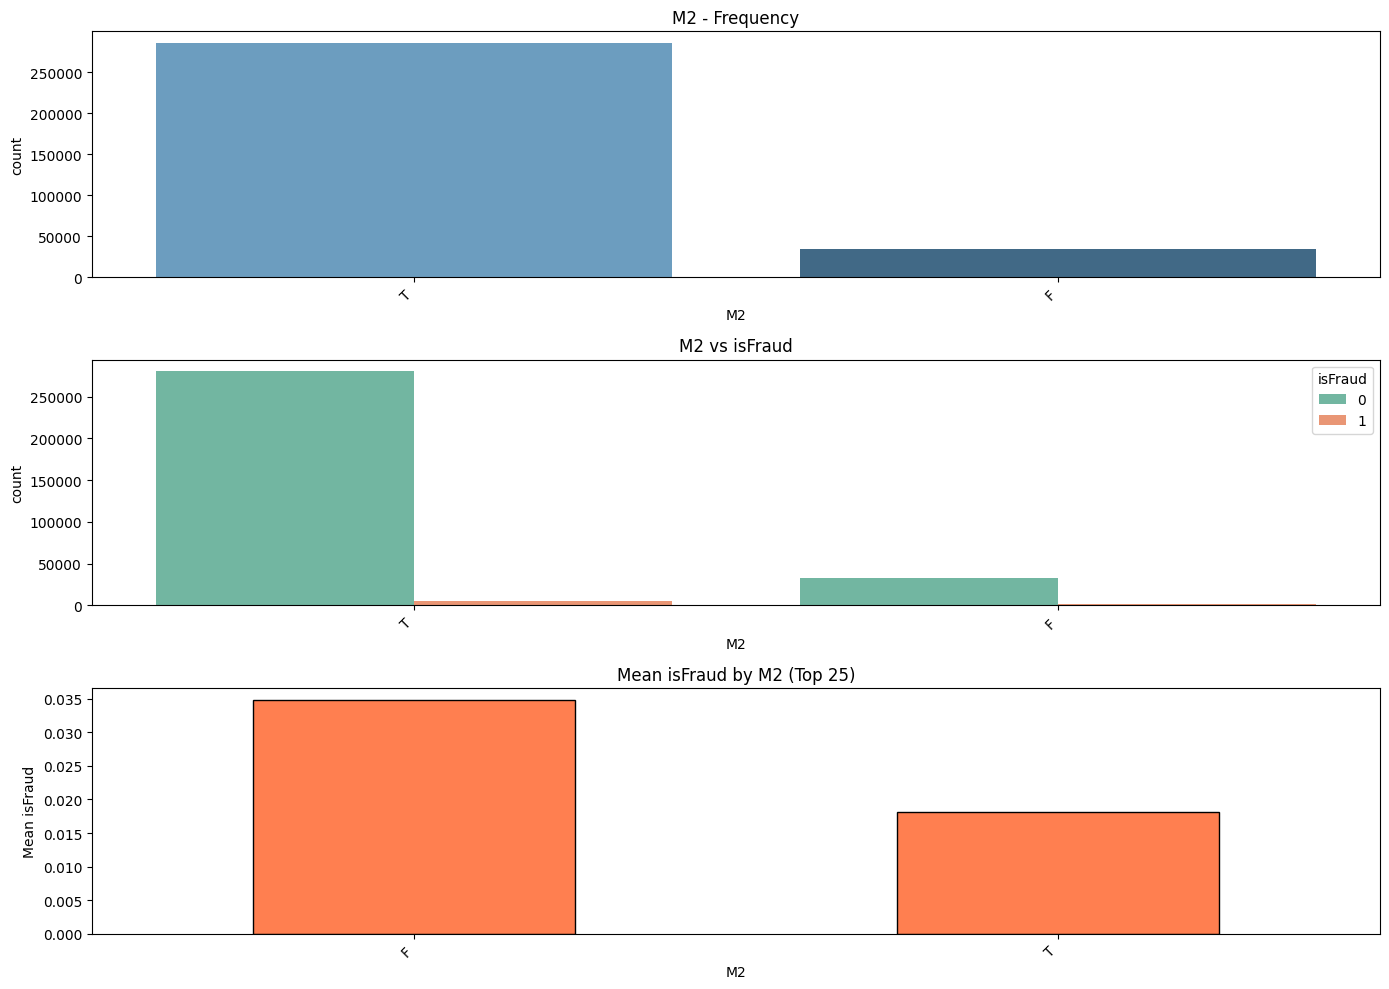

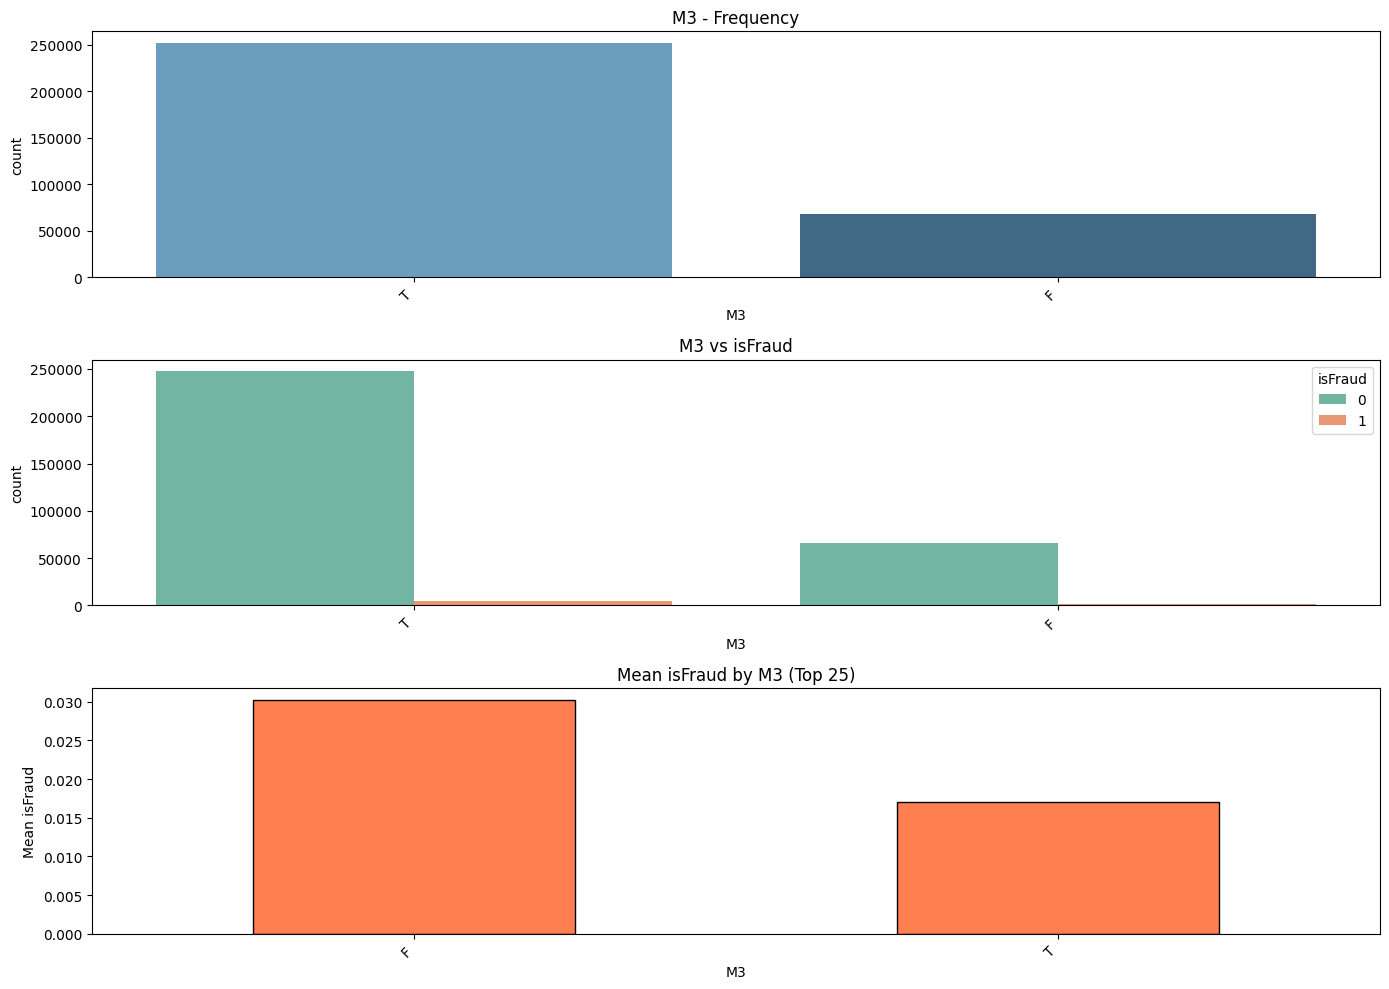

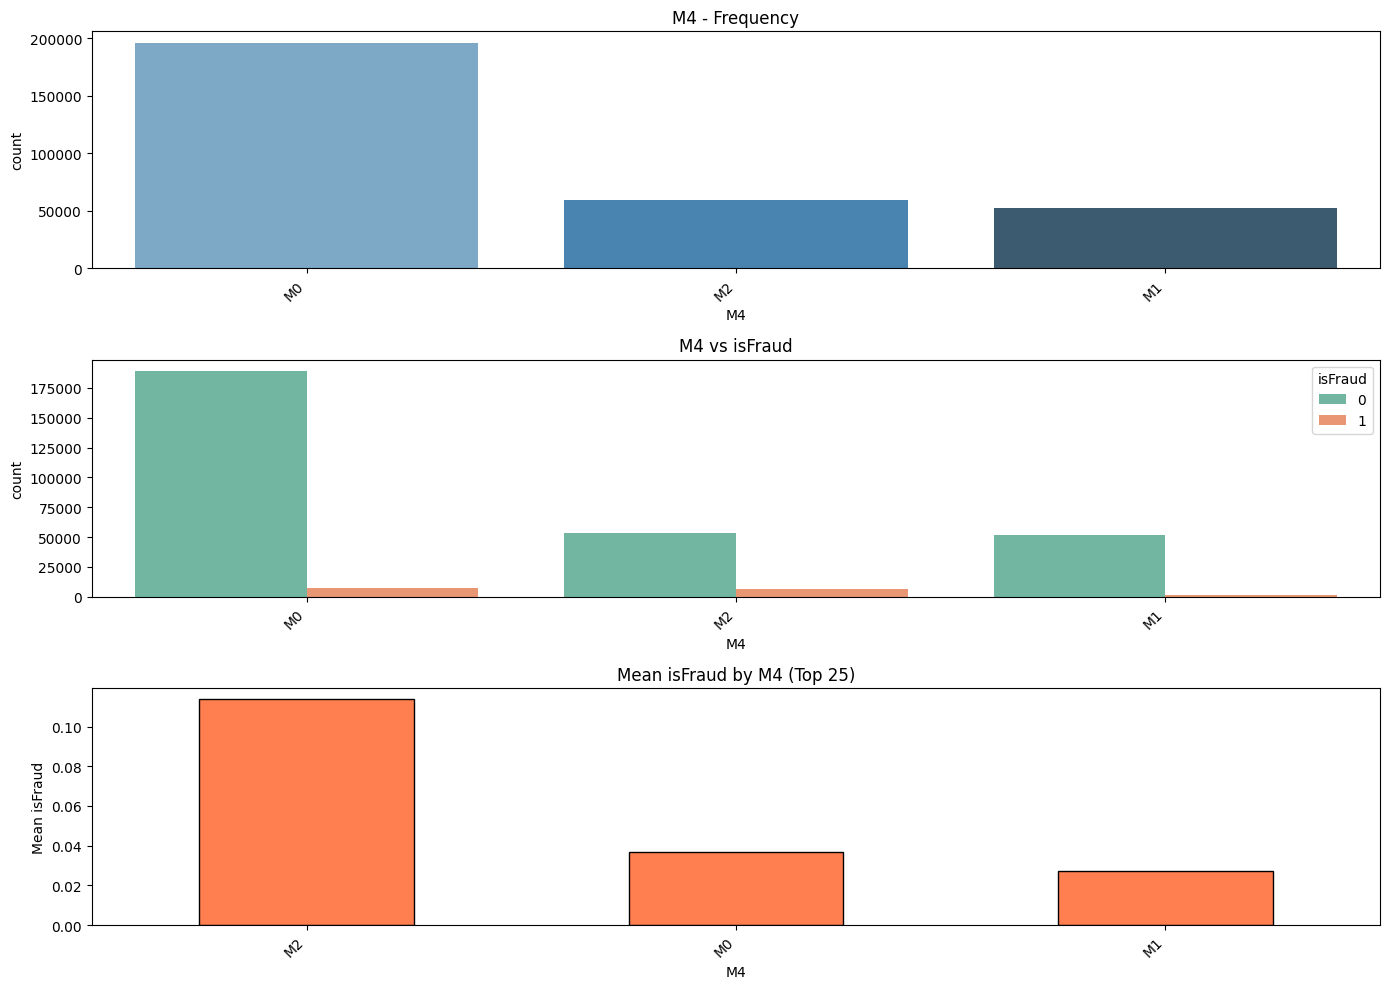

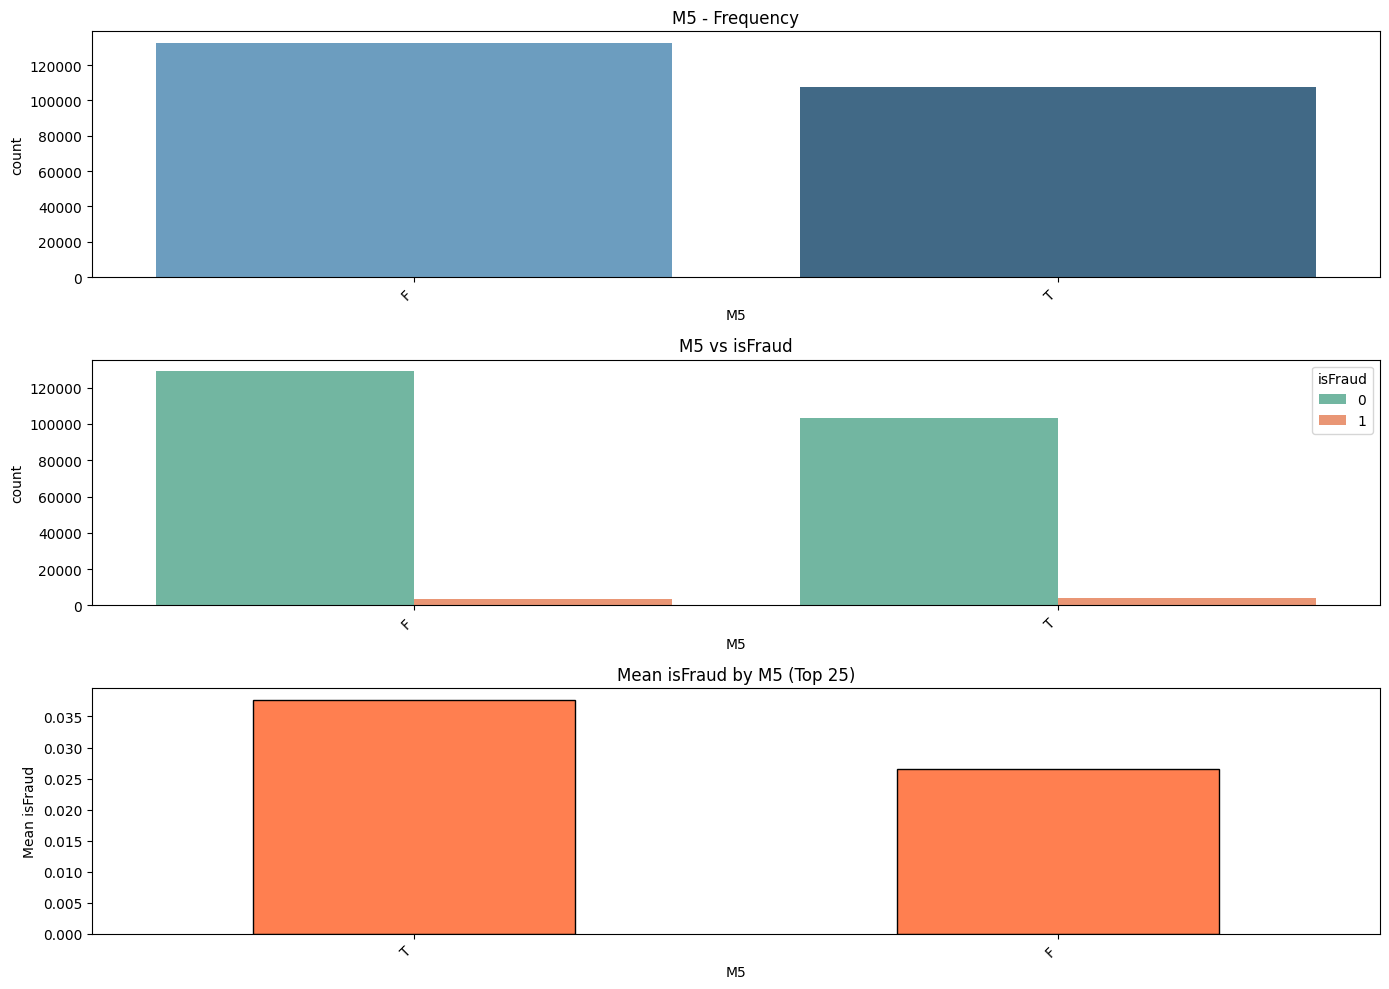

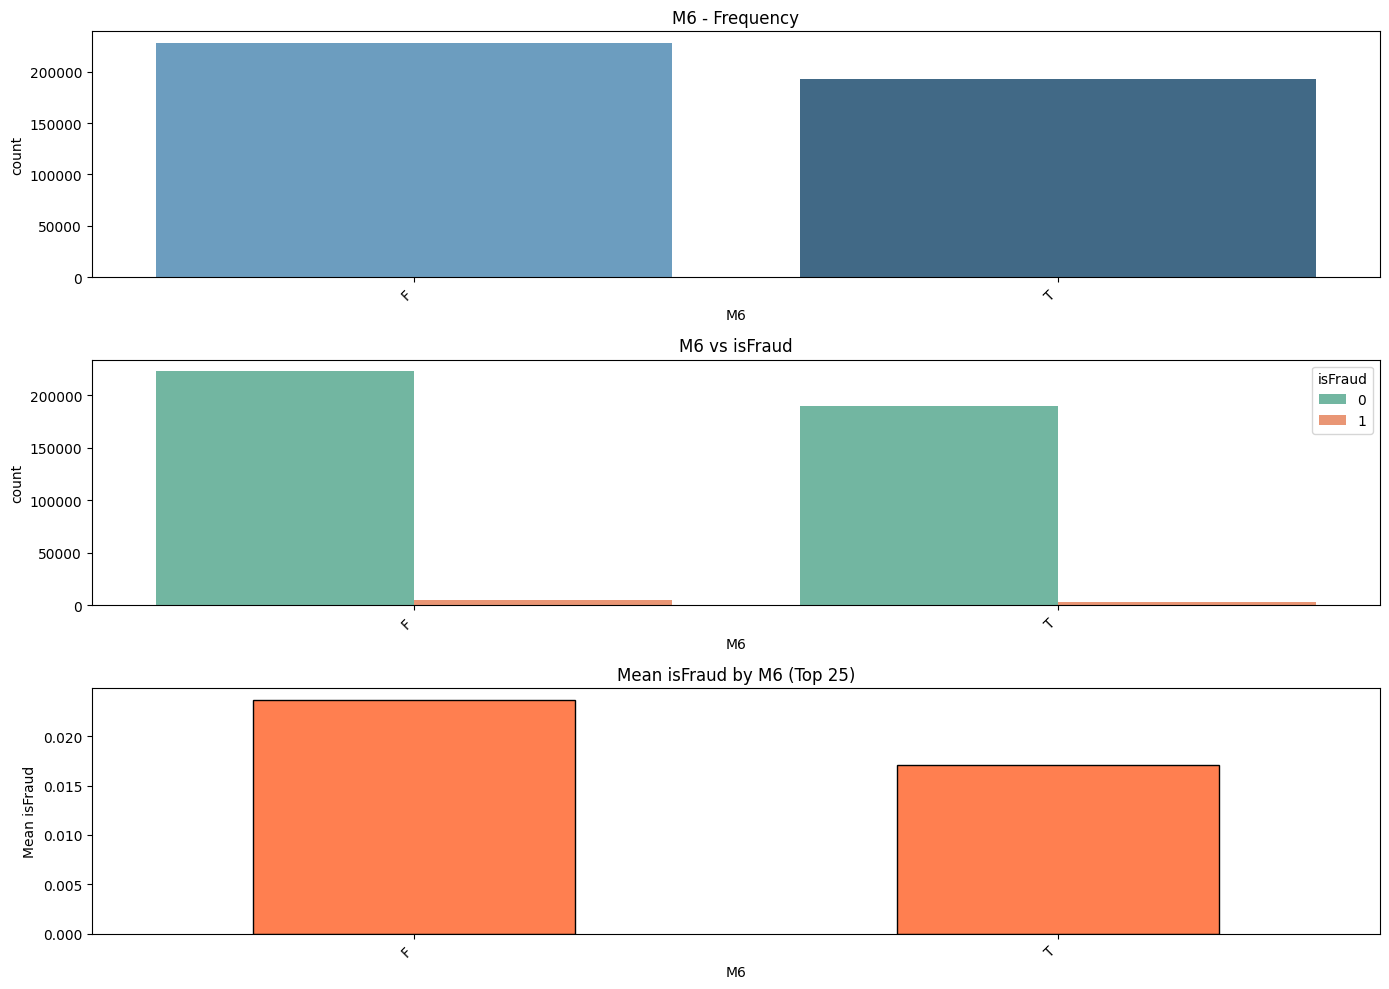

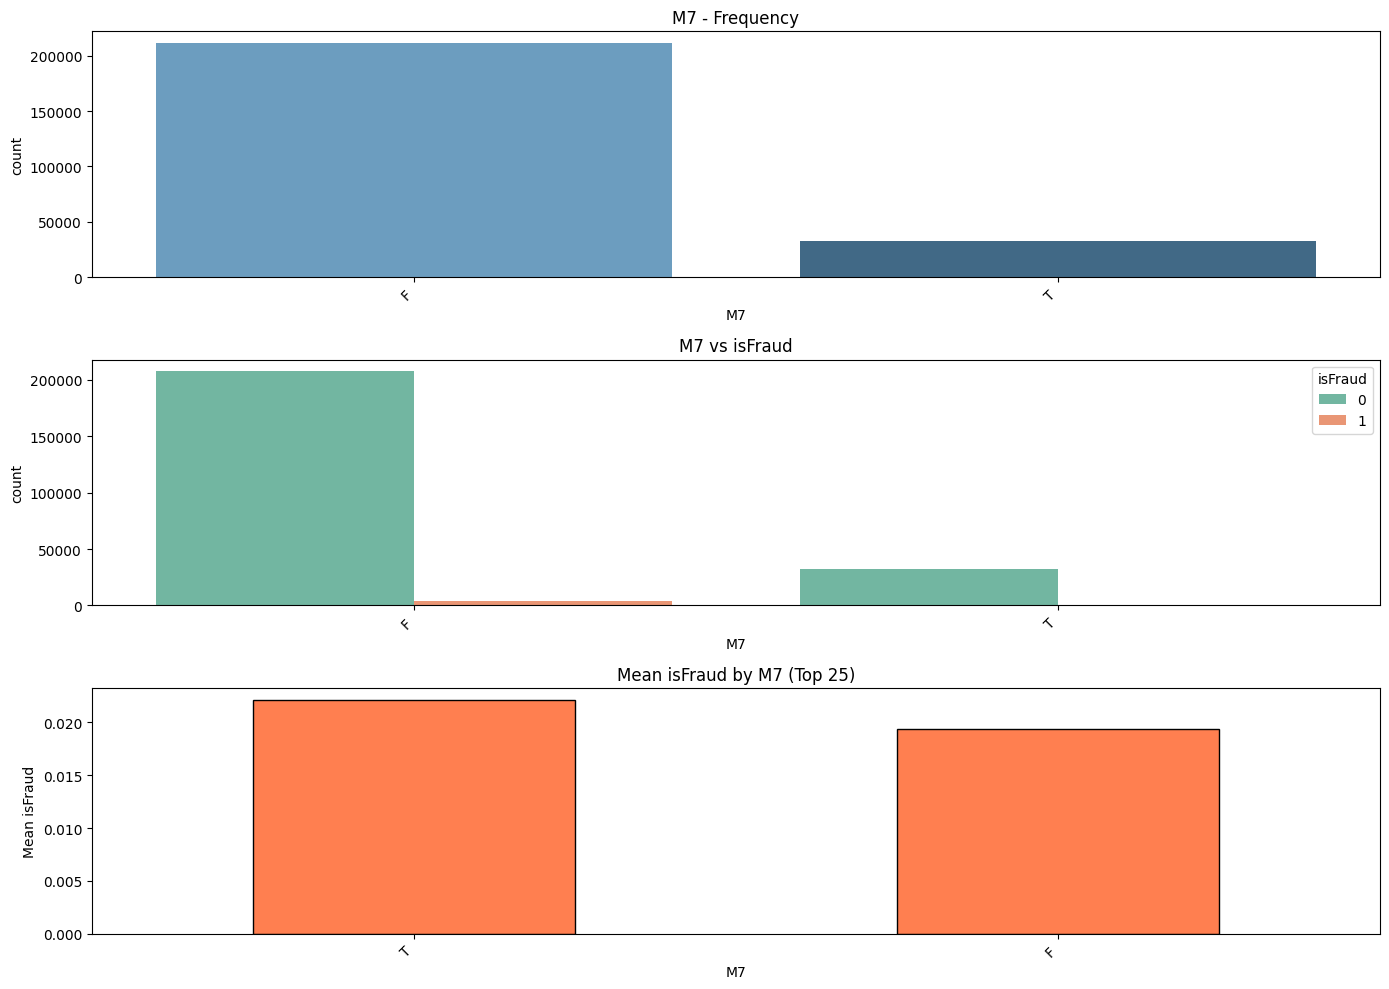

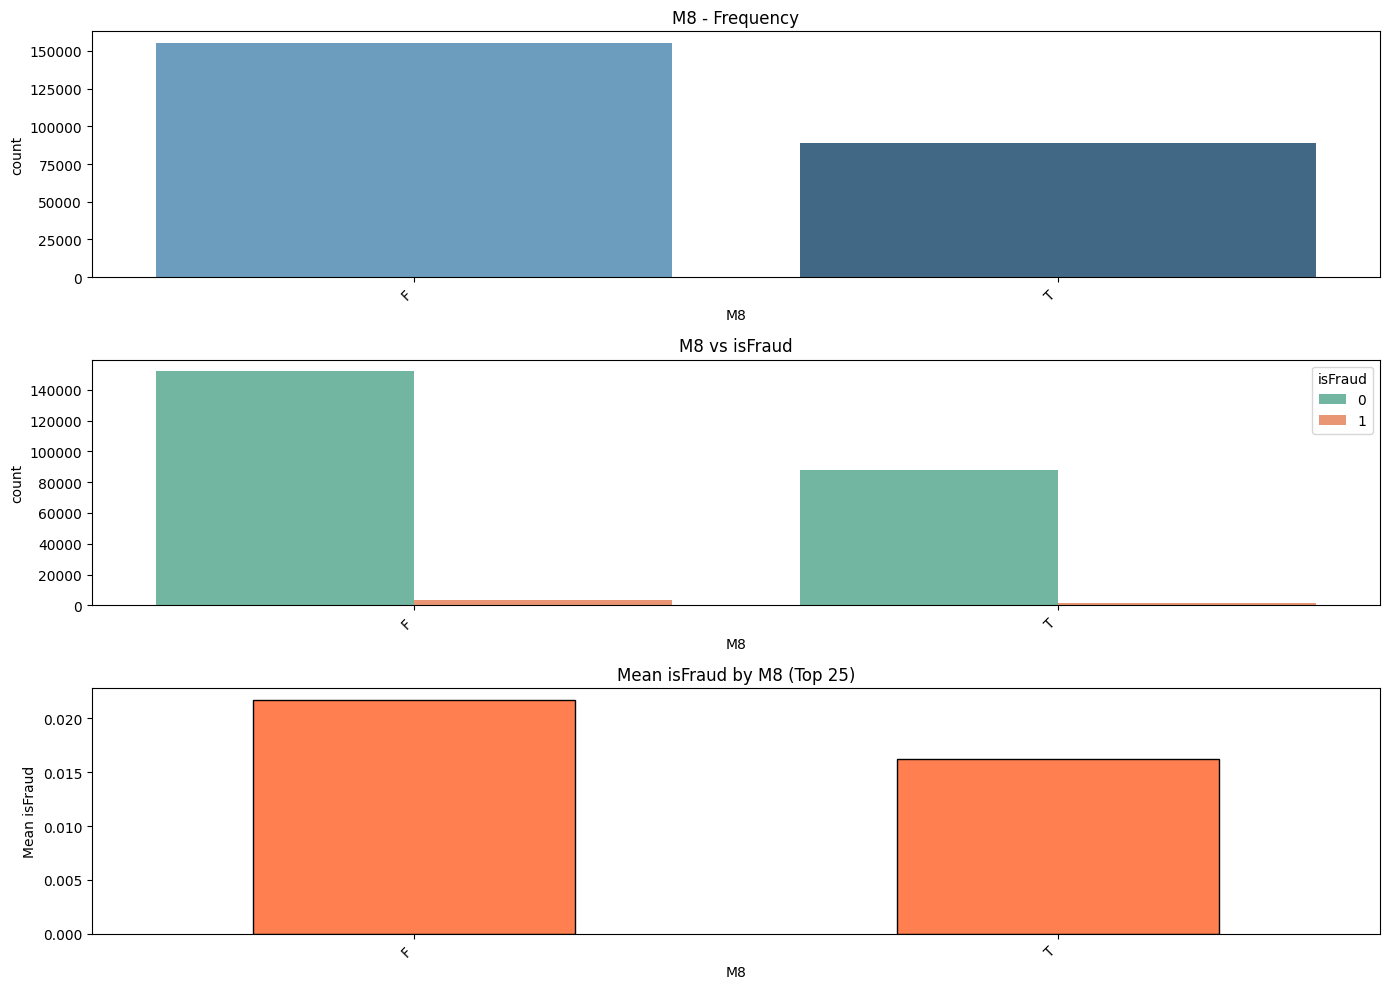

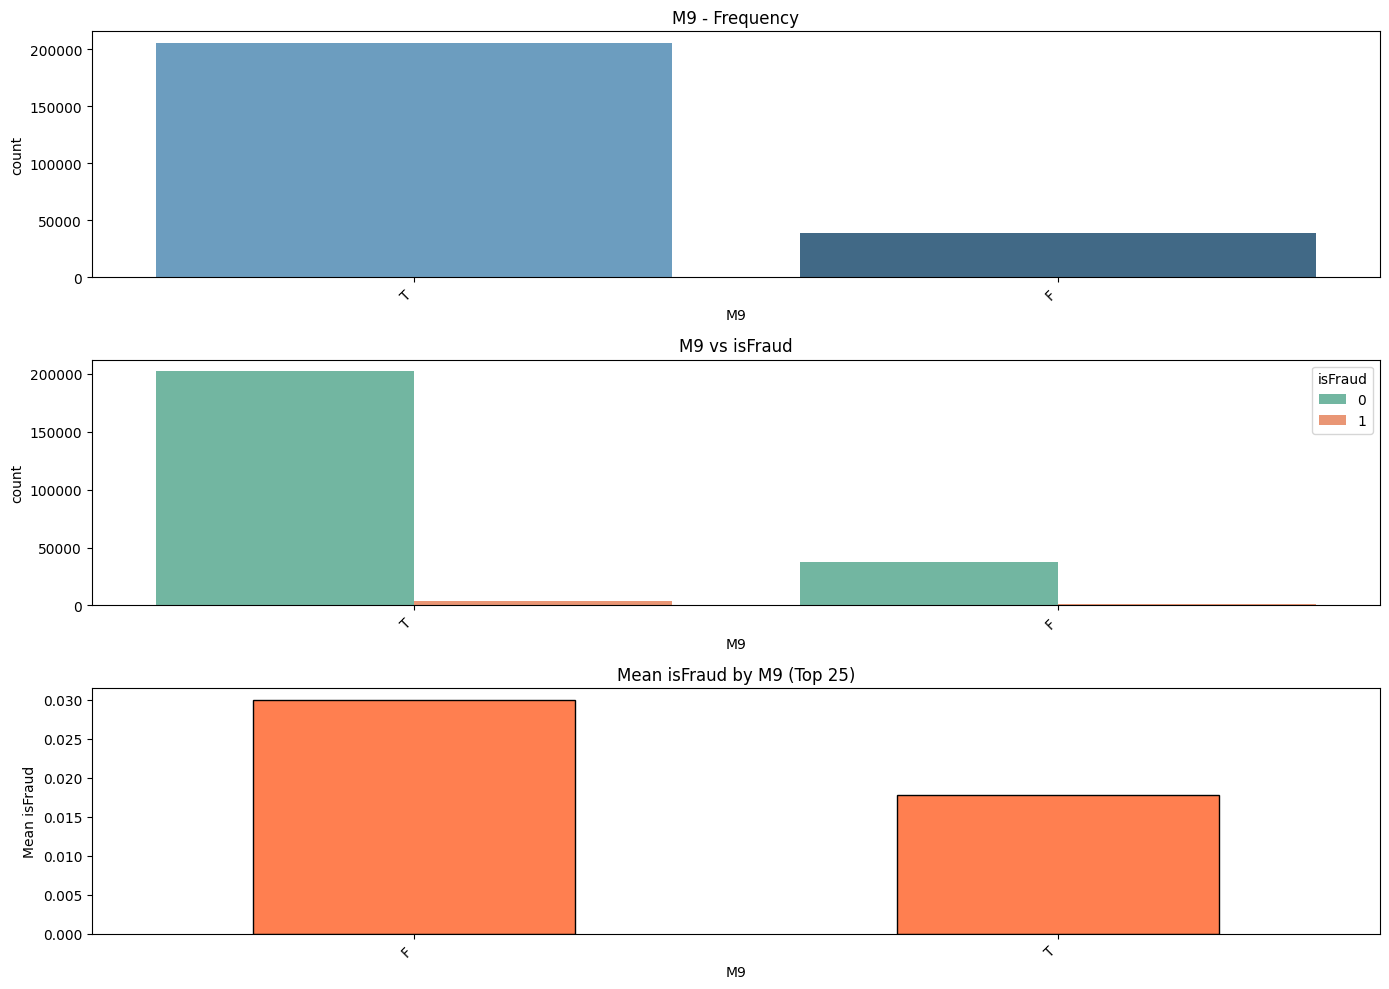

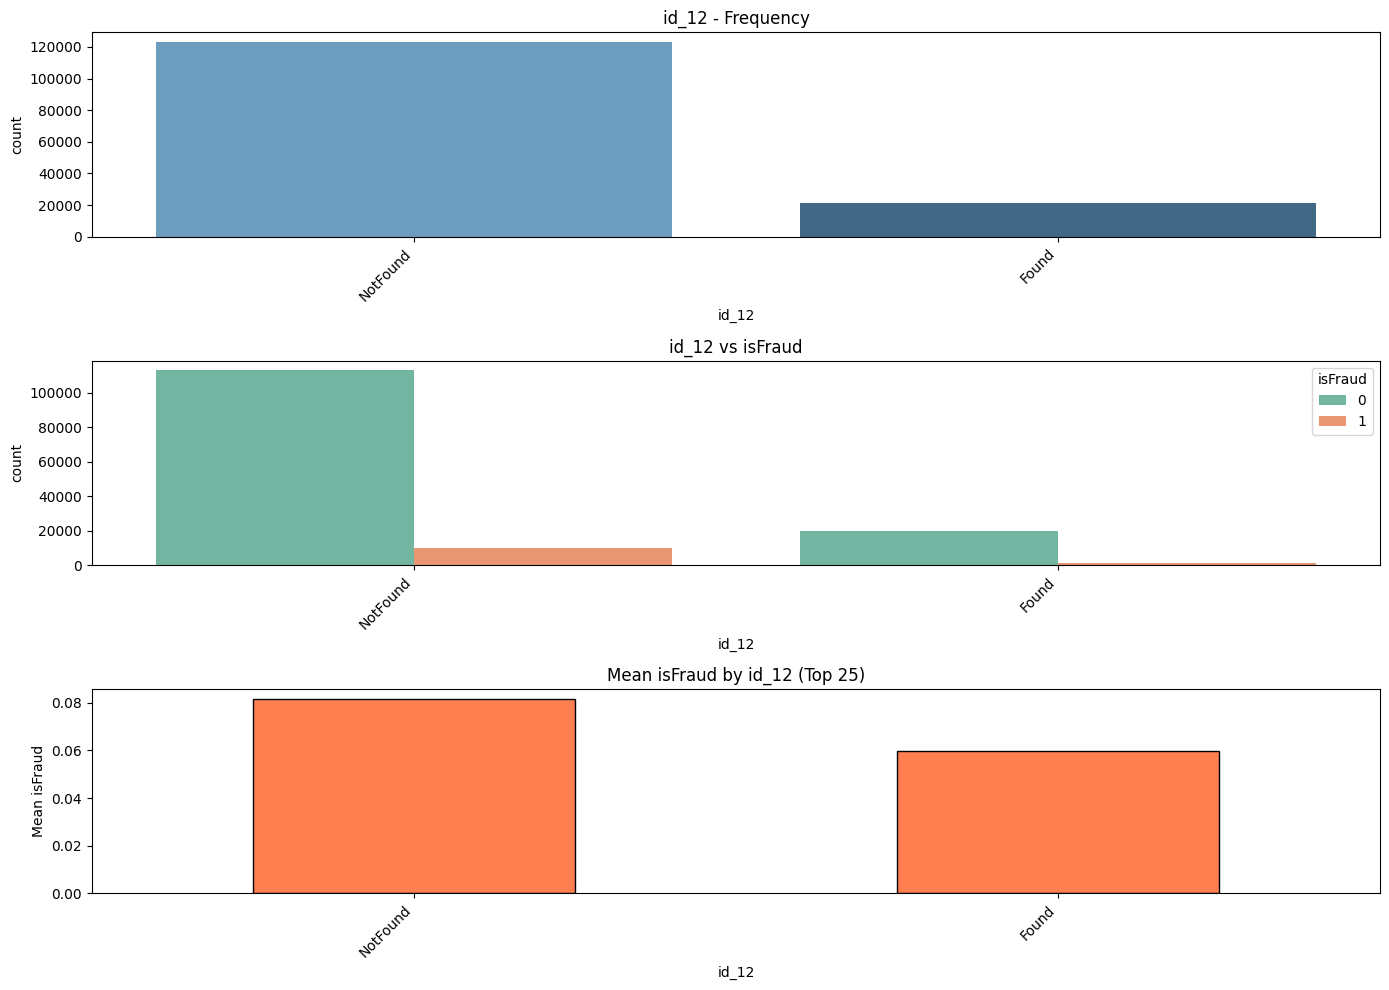

In [32]:
top_n = 25   

for col in cat_cols[:15]:
    plt.figure(figsize=(14, 10))  # Reasonable size
    
    plt.subplot(3, 1, 1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Blues_d')
    plt.title(f"{col} - Frequency")
    plt.xticks(rotation=45, ha='right')

    plt.subplot(3, 1, 2)
    sns.countplot(x=col, hue='isFraud', data=df, order=df[col].value_counts().index, palette='Set2')
    plt.title(f"{col} vs isFraud")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='isFraud')

    plt.subplot(3, 1, 3)
    target_mean = df.groupby(col)['isFraud'].mean()
    top_categories = target_mean.sort_values(ascending=False).head(top_n)
    top_categories.plot(kind='bar', color='coral', edgecolor='black')
    plt.title(f"Mean isFraud by {col} (Top {top_n})")
    plt.ylabel("Mean isFraud")
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
    plt.close() 

## Statistical Tests


In [33]:
from scipy.stats import f_oneway, ttest_ind

results = {}

for col in cat_cols:
    unique_val = df[col].dropna().unique()
    
    if len(unique_val) ==2:
        group1 = df[df[col] == unique_val[0]]['isFraud']
        group2 = df[df[col] == unique_val[1]]['isFraud']
        stats, p = ttest_ind(group1, group2)
        test_type = "ttest"
    else:
        groups = [df[df[col]==val]['isFraud'] for val in unique_val]
        stats, p = f_oneway(*groups)
        test_type = 'ANOVA'

    results[col] = {'Test': test_type,  
                   'Stats':stats,
                   'p-values':p
                   }
results_df = pd.DataFrame(results).T.sort_values('p-values')
print(results_df)


                Test        Stats  p-values
ProductCD      ANOVA   4307.63144       0.0
id_35          ttest   -54.313481       0.0
id_33          ANOVA    16.103184       0.0
id_31          ANOVA    36.693914       0.0
id_30          ANOVA     26.82412       0.0
id_16          ttest   -39.667236       0.0
M4             ANOVA  3293.932959       0.0
DeviceInfo     ANOVA    12.664518       0.0
card6          ANOVA  2005.952833       0.0
P_emaildomain  ANOVA     60.72813       0.0
R_emaildomain  ANOVA    63.893795       0.0
id_15          ANOVA   706.982691       0.0
id_29          ttest   -36.956778       0.0
id_28          ttest   -35.046477       0.0
id_38          ttest   -26.566295       0.0
DeviceType     ttest     24.75414       0.0
M3             ttest   -21.887289       0.0
M2             ttest   -20.978036       0.0
card4          ANOVA   121.699282       0.0
M9             ttest    15.851186       0.0
M5             ttest   -15.589461       0.0
M6             ttest   -15.11341

## Correlation

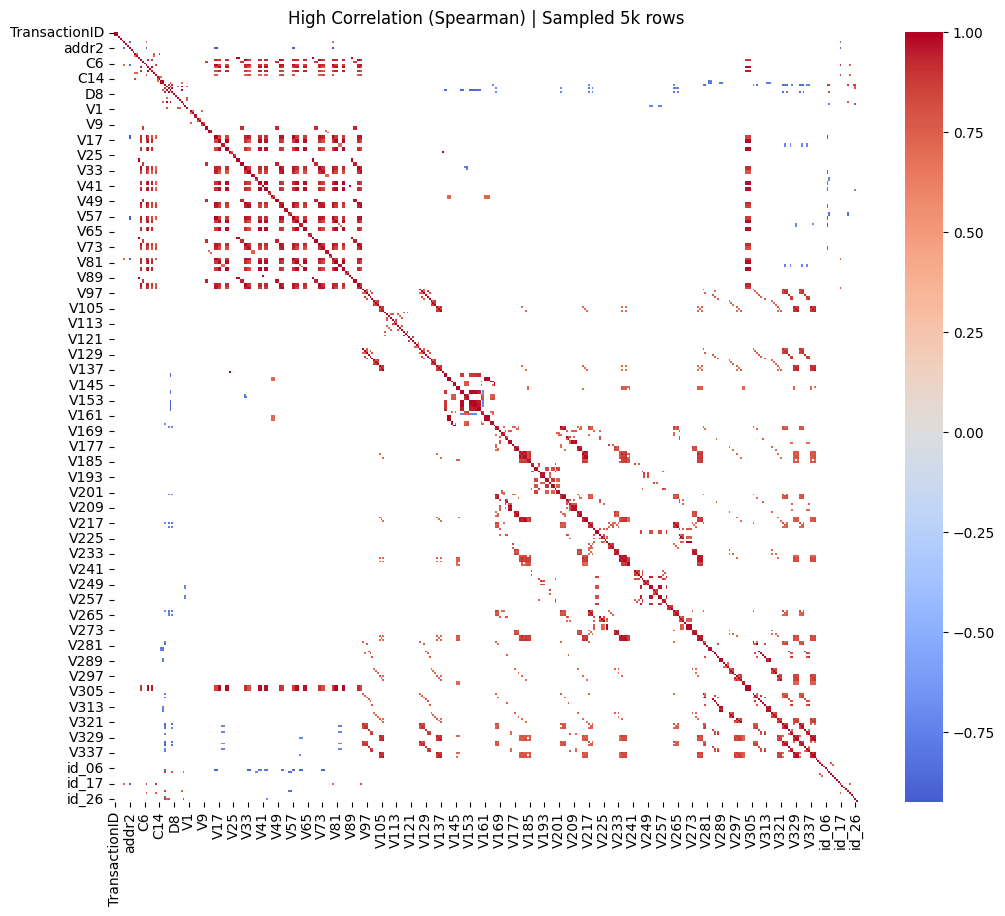

In [34]:
sample_df = df[num_cols].sample(n=5000, random_state=42)
corr = sample_df.corr(method='spearman')

mask = (corr > 0.7) | (corr < -0.7)
plt.figure(figsize=(12, 10))
sns.heatmap(corr[mask], cmap='coolwarm', center=0)
plt.title("High Correlation (Spearman) | Sampled 5k rows")
plt.show()
